<a href="https://colab.research.google.com/github/sam1nsattik/Machine-Learning-Projects-Google-Colab/blob/main/Customer_Segmentation_Analysis_for_Enhanced_Targeted_Marketing_Utilizing_UK_Based_Online_Retail_Transaction_Data_(2010_2011).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation Analysis for Enhanced Targeted Marketing: Utilizing UK-Based Online Retail Transaction Data (2010-2011)

---

## Project Objective:
Develop a machine learning model to segment retail customers based on their purchasing behavior. This segmentation will allow for targeted marketing, personalized customer experiences, and improved customer engagement.

## Tools and Libraries:
- Python for scripting.
- Pandas and NumPy for data manipulation.
- Matplotlib and Seaborn for data visualization.
- Scikit-learn for modeling and evaluation.


## Dataset Columns:

- **Invoice**: Invoice number (a unique identifier for each transaction).
- **StockCode**: Product code.
- **Description**: Product description.
- **Quantity**: The number of units purchased.
- **InvoiceDate**: The date and time of the transaction.
- **Price**: Unit price.
- **Customer ID**: Unique identifier for each customer.
- **Country**: Country where the customer resides.

In [4]:
import pandas as pd

# Load the dataset
file_path = 'online_retail_II.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
# Check for missing values in each column
missing_values = data.isnull().sum()
missing_values

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


## Handling Missing Values

### Current State of Missing Data
- **Description**: 2928
- **Customer ID**: 107927

### Steps to Address Missing Values

#### Description
- There is only one missing entry under "Description."
- Options:
  - Fill it with a placeholder such as "No Description."
  - Remove the row if the product description is not crucial for the segmentation analysis.

#### Customer ID
- Customer IDs are essential for customer segmentation as they serve as a unique identifier.
- Action: Remove rows with missing Customer IDs since we cannot aggregate customer data without them.

### Next Actions
1. Remove the row with a missing description.
2. Remove rows with missing customer IDs.




In [6]:
# Remove rows with missing 'Description' or 'Customer ID'
cleaned_data = data.copy().dropna(subset=['Description', 'Customer ID'])

# Verify cleaning by checking for missing values again
remaining_missing_values = cleaned_data.isnull().sum()
remaining_missing_values, cleaned_data.shape

(Invoice        0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 Price          0
 Customer ID    0
 Country        0
 dtype: int64,
 (417534, 8))

## Feature Engineering

To gain a deeper understanding of customer behavior, we will create aggregate features that summarize each customer's interaction with our business. These features will be calculated at the customer level and include:

### Aggregate Features

1. **Total Spending**
   - Definition: The sum of all spending per customer.
   - Calculation: Group data by 'Customer ID' and sum the total spending.

2. **Frequency of Purchases**
   - Definition: The number of transactions made by each customer.
   - Calculation: Group data by 'Customer ID' and count the number of transactions.

3. **Average Purchase Value**
   - Definition: The average amount spent per transaction by each customer.
   - Calculation: Group data by 'Customer ID' and calculate the average spending per transaction.

### Implementation Steps
- Start by grouping the data by 'Customer ID'.
- Perform the necessary aggregations to calculate the Total Spending, Frequency of Purchases, and Average Purchase Value.

In [7]:
# Calculate the total spending per transaction
cleaned_data['Total Spending'] = cleaned_data['Quantity'] * cleaned_data['Price']

# Aggregate data by 'Customer ID'
customer_data = cleaned_data.groupby('Customer ID').agg(
    Frequency=('Invoice', 'nunique'),  # Count unique invoices for frequency of purchases
    Total_Spending=('Total Spending', 'sum'),  # Sum of total spending
    Average_Purchase_Value=('Total Spending', 'mean')  # Average purchase value per transaction
).reset_index()

customer_data.head()


,Customer ID,Frequency,Total_Spending,Average_Purchase_Value
0,12346.0,15,-64.68,-1.406087
1,12347.0,2,1323.32,18.638310
2,12348.0,1,222.16,11.108000
3,12349.0,4,2646.99,24.738224
4,12351.0,1,300.93,14.330000


## Data Cleaning - Addressing Negative Spending Values

To ensure the quality of our customer segmentation analysis, we need to address entries with negative values in "Total Spending," which likely represent refunds or returns.

### Steps to Remove Negative Spending Values
Filter out and remove customers who have a negative value in "Total Spending". This will help in focusing only on actual purchasing behavior.

## Exploratory Data Analysis (EDA)

After cleaning the data, we will perform exploratory data analysis to visually explore the distributions of features and identify any patterns or potential outliers that could affect our segmentation strategy.

### EDA Objectives
- **Understand Feature Distributions**: Use histograms, box plots, and density plots to get a sense of the spread and central tendency of each feature.
- **Detect Outliers**: Look for anomalies in the data that may need to be addressed to improve the accuracy of our analysis.

### Implementation Steps
1. Begin with visualizations for "Total Spending", "Frequency of Purchases", and "Average Purchase Value" to assess distribution and identify outliers.
2. Analyze any visible patterns between "Total Spending" and other features like "Frequency of Purchases" to understand customer behavior.
3. Adjust visual and analytical methods based on initial findings to deepen the exploration.

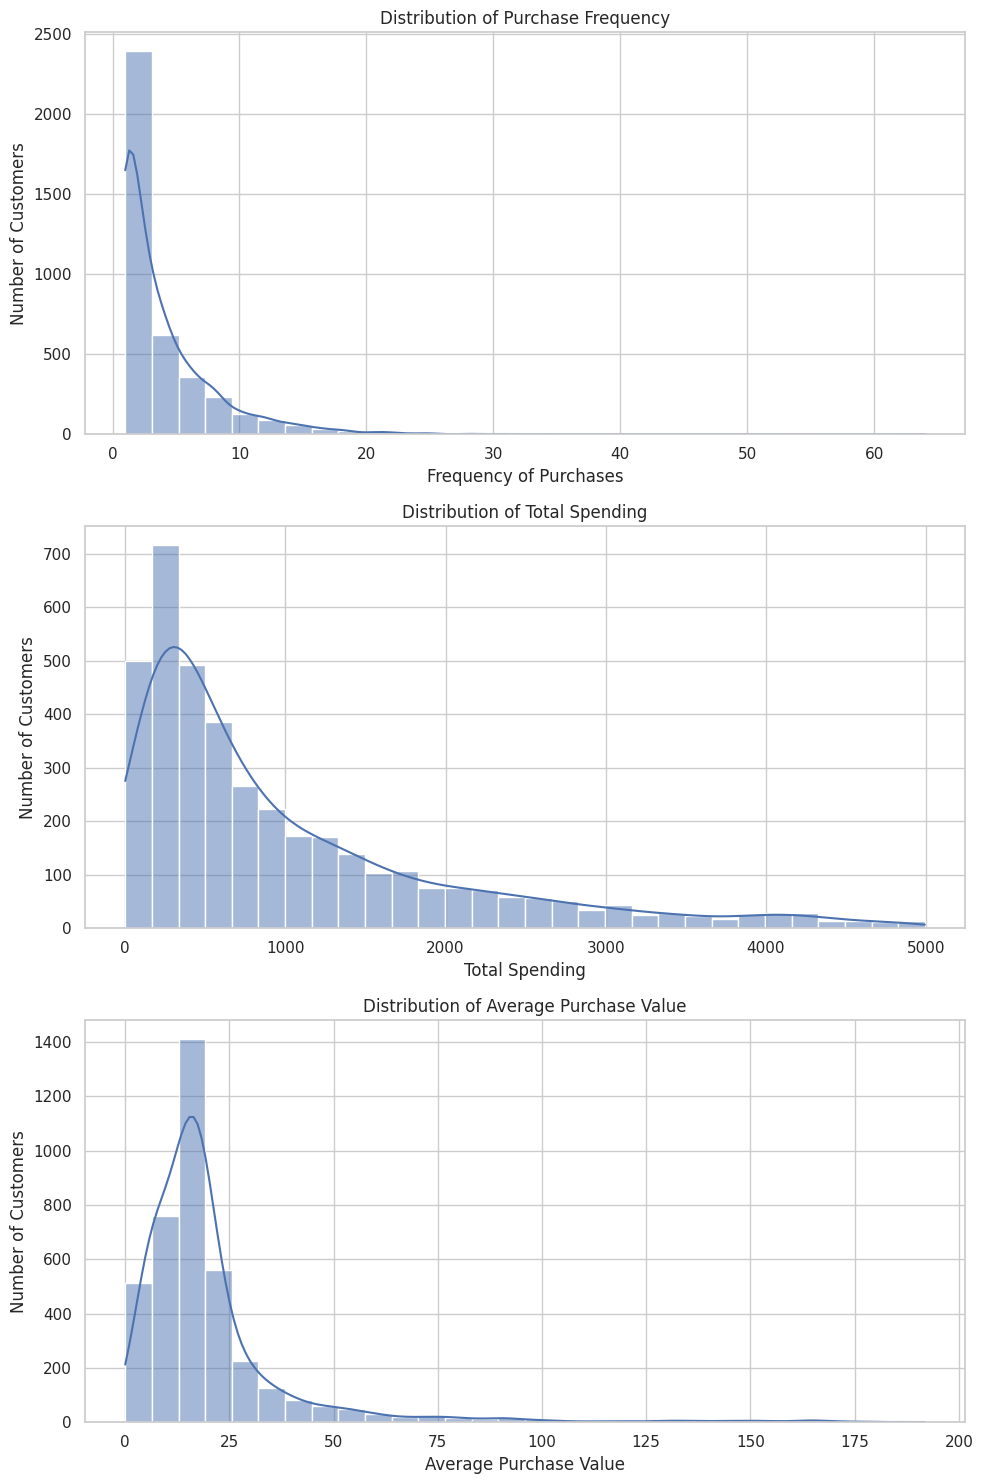

In [8]:
# Remove customers with negative total spending
positive_spending_customers = customer_data[customer_data['Total_Spending'] > 0]

# Proceed with EDA: Visualizing the distributions of 'Frequency', 'Total_Spending', and 'Average_Purchase_Value'
import matplotlib.pyplot as plt
import seaborn as sns

# Define maximum limits for each category
max_frequency = 100
max_total_spending = 5000
max_average_purchase_value = 200

# Filter the data to include only values below the defined thresholds
filtered_data = positive_spending_customers[
    (positive_spending_customers['Frequency'] <= max_frequency) &
    (positive_spending_customers['Total_Spending'] <= max_total_spending) &
    (positive_spending_customers['Average_Purchase_Value'] <= max_average_purchase_value)
]

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Frequency distribution
sns.histplot(filtered_data['Frequency'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Purchase Frequency')
axes[0].set_xlabel('Frequency of Purchases')
axes[0].set_ylabel('Number of Customers')

# Total Spending distribution
sns.histplot(filtered_data['Total_Spending'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Total Spending')
axes[1].set_xlabel('Total Spending')
axes[1].set_ylabel('Number of Customers')

# Average Purchase Value distribution
sns.histplot(filtered_data['Average_Purchase_Value'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Distribution of Average Purchase Value')
axes[2].set_xlabel('Average Purchase Value')
axes[2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

## Insights from Visualizations

After conducting exploratory data analysis, we have uncovered several key insights about the distribution of customer features, which can guide our further analysis and segmentation strategy.

### Purchase Frequency
- **Observation**: Most customers exhibit a low frequency of purchases.
- **Interpretation**: This suggests that a large portion of our customer base consists of one-time or infrequent shoppers.

### Total Spending
- **Observation**: The distribution of total spending among customers is skewed towards lower values.
- **Interpretation**: Similar to the purchase frequency, fewer customers are responsible for higher spending amounts, indicating that most customers spend relatively small amounts.

### Average Purchase Value
- **Observation**: The distribution for average purchase value is skewed towards lower values, with a few exceptions of significantly higher values.
- **Interpretation**: These outliers may represent premium buyers or customers making bulk purchases, distinguishing them from the general trend.

### Summary
These insights help identify potential segments within our customer base, such as infrequent shoppers, consistent low spenders, and high-value purchasers. Each of these groups may require different marketing strategies to effectively engage and convert.


## Handling Outliers

The presence of outliers can significantly skew the results of clustering algorithms such as K-Means, which are sensitive to extreme values. To ensure more accurate clustering, we will address outliers in key metrics.

### Steps for Outlier Handling

#### Identify Outliers
- **Method**: Use the Interquartile Range (IQR) method.
- **Features to Analyze**:
  - 'Frequency'
  - 'Total Spending'
  - 'Average Purchase Value'
- **Process**:
  - Calculate the IQR for each feature.
  - Determine the lower and upper bounds to identify outliers (typically 1.5 * IQR below Q1 and above Q3).

#### Cap Outliers
- **Strategy**: Instead of removing outliers, cap values at a certain percentile.
- **Rationale**: This approach mitigates the influence of extreme outliers while preserving as much data as possible.
- **Implementation**:
  - For 'Frequency' and 'Total Spending', cap values at the 95th percentile.
  - For 'Average Purchase Value', consider a lower percentile if outliers are more extreme.

### Implementation Steps
1. Calculate the IQR and define bounds for each feature.
2. Identify outliers using these bounds.
3. Cap the outliers at the specified percentiles to reduce their impact on the analysis.

This method of handling outliers will help maintain the integrity of our data and ensure that our clustering algorithms perform optimally.


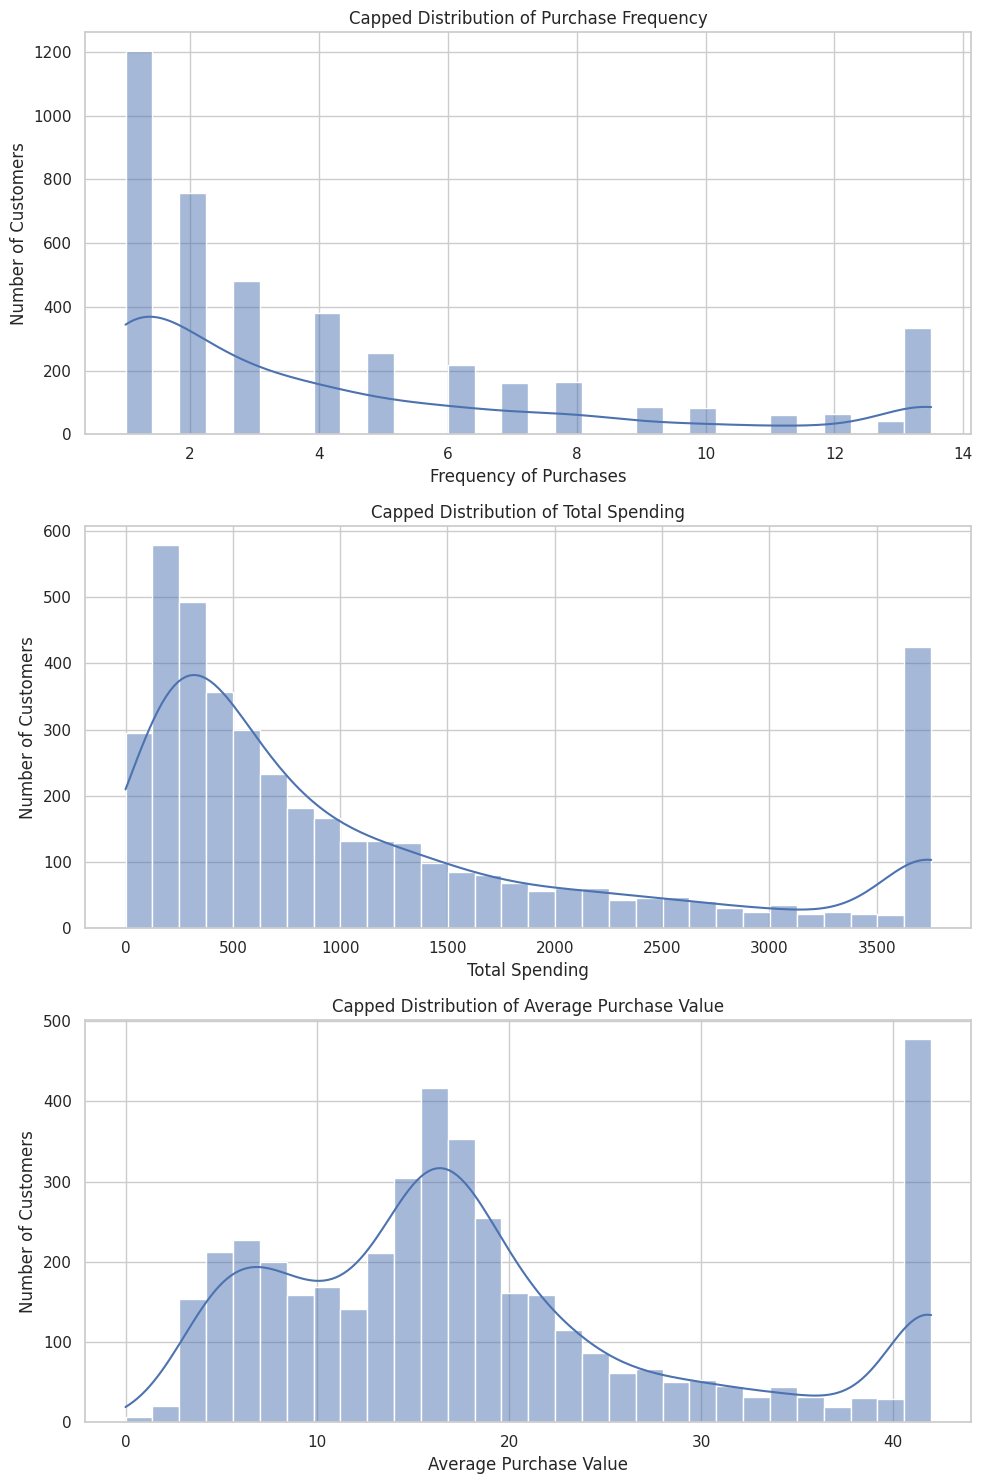

In [9]:
# Calculate IQR for outlier detection and capping
Q1 = positive_spending_customers.quantile(0.25)
Q3 = positive_spending_customers.quantile(0.75)
IQR = Q3 - Q1

# Define the upper bounds to cap outliers
upper_bounds = Q3 + 1.5 * IQR

# Cap outliers in the dataset
capped_data = positive_spending_customers.copy()
capped_data['Frequency'] = capped_data['Frequency'].clip(upper=upper_bounds['Frequency'])
capped_data['Total_Spending'] = capped_data['Total_Spending'].clip(upper=upper_bounds['Total_Spending'])
capped_data['Average_Purchase_Value'] = capped_data['Average_Purchase_Value'].clip(upper=upper_bounds['Average_Purchase_Value'])

# Visualize the capped data to see the effect of outlier handling
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Frequency distribution
sns.histplot(capped_data['Frequency'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Capped Distribution of Purchase Frequency')
axes[0].set_xlabel('Frequency of Purchases')
axes[0].set_ylabel('Number of Customers')

# Total Spending distribution
sns.histplot(capped_data['Total_Spending'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Capped Distribution of Total Spending')
axes[1].set_xlabel('Total Spending')
axes[1].set_ylabel('Number of Customers')

# Average Purchase Value distribution
sns.histplot(capped_data['Average_Purchase_Value'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Capped Distribution of Average Purchase Value')
axes[2].set_xlabel('Average Purchase Value')
axes[2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()


## Proceeding with Clustering

With the data now prepared and outliers handled, we are ready to apply the K-Means clustering algorithm. This step involves determining the optimal number of clusters to effectively segment our customer base.

### Steps for Applying K-Means Clustering

#### Determine Optimal Number of Clusters
- **Method**: Use the Elbow method.
- **Metric**: Sum of Squared Distances (SSD) between data points and their assigned cluster's centroid.
- **Process**:
  - Compute SSD for a range of cluster numbers (e.g., 1-10).
  - Plot SSD against the number of clusters.
  - Identify the "elbow point" where the decrease in SSD becomes less pronounced, indicating the optimal number of clusters.

This method will help us identify the most appropriate number of clusters for our K-Means analysis, ensuring that we capture meaningful customer segments without overfitting or underfitting our model.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

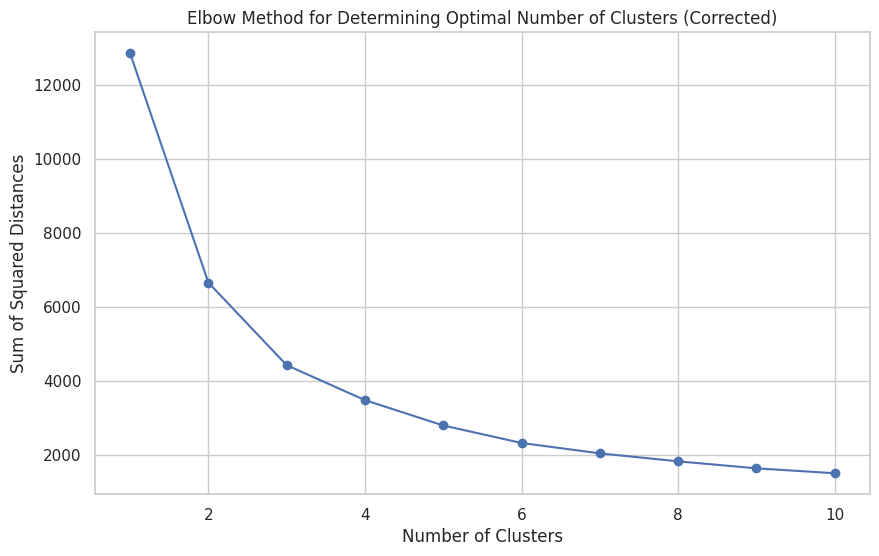

In [13]:
from sklearn.cluster import KMeans

# Normalize features
features_scaled = (capped_data[['Frequency', 'Total_Spending', 'Average_Purchase_Value']] -
                             capped_data[['Frequency', 'Total_Spending', 'Average_Purchase_Value']].mean()) / \
                             capped_data[['Frequency', 'Total_Spending', 'Average_Purchase_Value']].std()


# Proceed with the Elbow method to determine the optimal number of clusters
ssd_corrected = []
range_clusters_corrected = range(1, 11)  # Testing for 1 to 10 clusters

for num_clusters in range_clusters_corrected:
    kmeans_corrected = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_corrected.fit(features_scaled)
    ssd_corrected.append(kmeans_corrected.inertia_)

# Plotting the SSD for each number of clusters again
plt.figure(figsize=(10, 6))
plt.plot(range_clusters_corrected, ssd_corrected, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters (Corrected)')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()


## Analysis of the Elbow Plot

The Elbow method plot is crucial for determining the optimal number of clusters by observing changes in the sum of squared distances (SSD) between data points and their assigned cluster's centroid. This metric helps us evaluate the benefit of adding more clusters.

### Observations from the Elbow Plot
- **Elbow Point**: The reduction in SSD begins to diminish significantly at around 6 to 8 clusters.
- **Analysis**:
  - There is a noticeable flattening in the reduction of SSD after 6 clusters.
  - A slight additional decline in SSD is observed at 8 clusters, suggesting potential benefits of considering an extra cluster.

### Suggestion
- **Opt for 8 Clusters**: Choosing 8 clusters may offer a good balance, allowing for a more nuanced segmentation of the customer data without overly complicating the model. This approach aims to capture distinct customer behaviors while ensuring model simplicity and effectiveness.



## Applying K-Means Clustering

Now that the optimal number of clusters has been determined, we will proceed with applying the K-Means clustering algorithm to segment the customer data using 8 clusters. This approach will help us uncover distinct customer behaviors and preferences.

### Steps for Clustering and Analysis

#### Perform K-Means Clustering
- **Number of Clusters**: 8
- **Process**:
  - Apply the K-Means clustering algorithm to the prepared data.
  - Assign each data point to one of the 8 clusters based on their characteristics.

#### Analyze Cluster Characteristics
- **Objective**: Understand the distinct segments represented by each cluster.
- **Method**:
  - Calculate the average values for key metrics (e.g., Total Spending, Frequency of Purchases, Average Purchase Value) within each cluster.
  - Compare these averages to identify the unique characteristics and behaviors of customers in each cluster.

This structured approach allows us to effectively segment the customer base and gain insights into different customer profiles, which can inform targeted marketing strategies and business decisions.


In [18]:
# Perform K-Means Clustering with 8 clusters
kmeans_final = KMeans(n_clusters=8, random_state=42)
clusters = kmeans_final.fit_predict(features_scaled)

# Add the cluster labels to the original data
capped_data['Cluster'] = clusters

# Analyze the characteristics of each cluster by computing mean values of the features within each cluster
cluster_characteristics = capped_data.groupby('Cluster').agg(
    Average_Frequency=('Frequency', 'mean'),
    Average_Total_Spending=('Total_Spending', 'mean'),
    Average_Purchase_Value=('Average_Purchase_Value', 'mean'),
    Count=('Customer ID', 'count')
).reset_index()

cluster_characteristics

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster,Average_Frequency,Average_Total_Spending,Average_Purchase_Value,Count
0,0,4.605753,1291.764687,18.131914,591
1,1,12.039617,3432.743496,16.123534,366
2,2,2.261745,424.886746,6.756852,894
3,3,1.658070,388.853163,17.661784,1202
4,4,12.877483,3686.528129,38.758497,151
5,5,8.640741,1837.495990,12.524836,405
6,6,2.218487,617.462878,38.425357,476
7,7,5.601010,2874.312131,37.009132,198


## Cluster Analysis:

### Cluster 0
- **Average Frequency:** 4.61
- **Average Total Spending:** £1291.76
- **Average Purchase Value:** £18.13
- **Count:** 591
- **Insight:** Frequent, moderate spenders with lower purchase values per transaction, indicating regular small purchases.

### Cluster 1
- **Average Frequency:** 12.04
- **Average Total Spending:** £3432.74
- **Average Purchase Value:** £16.12
- **Count:** 366
- **Insight:** Highly frequent shoppers with the highest total spending, buying lower-priced items in bulk.

### Cluster 2
- **Average Frequency:** 2.26
- **Average Total Spending:** £424.89
- **Average Purchase Value:** £6.76
- **Count:** 894
- **Insight:** Infrequent, low spenders purchasing very low-value items, likely casual shoppers.

### Cluster 3
- **Average Frequency:** 1.66
- **Average Total Spending:** £388.85
- **Average Purchase Value:** £17.67
- **Count:** 1202
- **Insight:** Low frequency and spending, with moderate purchase values, indicating occasional specific purchases.

### Cluster 4
- **Average Frequency:** 12.88
- **Average Total Spending:** £3686.53
- **Average Purchase Value:** £38.76
- **Count:** 151
- **Insight:** High frequency and spending with relatively high purchase values, potentially loyal customers purchasing premium products.

### Cluster 5
- **Average Frequency:** 8.64
- **Average Total Spending:** £1837.50
- **Average Purchase Value:** £12.52
- **Count:** 405
- **Insight:** Quite frequent and moderate spenders, likely targeting mid-range products.

### Cluster 6
- **Average Frequency:** 2.22
- **Average Total Spending:** £617.46
- **Average Purchase Value:** £38.43
- **Count:** 476
- **Insight:** Low frequency but higher spending per transaction, suggesting occasional purchases of expensive items.

### Cluster 7
- **Average Frequency:** 5.60
- **Average Total Spending:** £2874.31
- **Average Purchase Value:** £37.01
- **Count:** 198
- **Insight:** Moderate frequency with high spending and purchase values, indicating regular purchases of high-value items.

## Summary and Strategic Insights:
- **Clusters with High Frequency and High Spending (1 and 4):** These are valuable segments showing loyal and bulk purchasing behavior. Tailored rewards and loyalty programs could enhance their engagement and retention.
- **Low Frequency, High Purchase Value Clusters (6 and 7):** These customers may be attracted to high-value items and could be targeted with promotions on exclusive or premium products.
- **Clusters with Lower Spending or Frequency (2, 3, and 5):** These segments may benefit from targeted marketing campaigns to increase their purchase frequency or move them towards higher-value items.
